In [417]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.random import uniform
from sklearn.metrics import pairwise_distances_argmin

# Implement KMeans as a function

In [418]:
def kmeans_from_scratch(X, k_clusters, seed=42):
    """Implements the k-means algorithm from scratch"""

    # Randomly choose clusters from data points
    # Random number generator by shuffling data points and selecting the n first
    rng = np.random.RandomState(seed)
    i = rng.permutation(X.shape[0])[:k_clusters]
    print(i)
    centers = X[i]
    print(centers[0])

    while True:
        # E-step: Assign each instance to the nearest centroid
        clusters = pairwise_distances_argmin(X, centers)

        # M-step: set the centroïd to the mean of its instances
        new_centers = np.array([X[clusters == i].mean(0) for i in range(k_clusters)])

        # Break out of the loop if no more iterations
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, clusters


def KMeans(x, n_clusters):
  """Perform KMeans clustering and return clustering labels

  Arguments:
    x: a 2-D numpy array, with shape (n, d), n is the number of data points, d is the feature dimention
    n_clusters: integer, desired number of clusters

  Returns:
    labels: a 1-D numpy array, with shape (n, )

  """
  labels = None
  ################################Write you code here (20 points)#######################################

  #centroid = (np.random.normal(size=(n_clusters, 2))* 0.0001)+np.mean(x)
  prev_centroids = None
  a = []
  min_, max_ = np.min(x, axis=0), np.max(x, axis=0)
  centroids = [uniform(min_, max_) for _ in range(n_clusters)]
  centroids2 = [uniform(min_, max_) for _ in range(n_clusters)]
  
  while True:
    # E-step: Assign each instance to the nearest centroid
    #clusters = pairwise_distances_argmin(x, centroids)
    a = []
    #dists2 = np.linalg.norm(x - centroids, axis=1, keepdims=True)
    for row in x:
        
        #dists = np.sqrt(np.sum((row - centroids2)**2, axis=1,keepdims=True))
        dists = np.linalg.norm(row - centroids, axis=1, keepdims=True)

        centroid_idx = np.argmin(dists)
        #print((np.sum((row - centroids2)**2,axis=0,keepdims=True)).shape)
        a.append(centroid_idx)

    # M-step: set the centroïd to the mean of its instances
    clusters = np.array(a)
    new_centroids = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

    # Break out of the loop if no more iterations
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids
  
  labels = clusters
    
  for row in x:
    dists = np.sqrt(np.sum((row - centroids2)**2, axis=1,keepdims=True))
    
    centroid_idx = np.argmin(dists)
    #print((np.sum((row - centroids2)**2,axis=0,keepdims=True)).shape)
    a.append(centroid_idx)
    #break
  



  ################################End of your code######################################################
  return labels

# Test your implementation of KMeans on a simple dataset

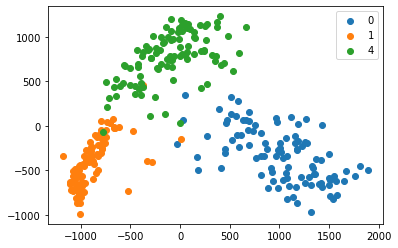

In [419]:
# We select 100 images each for digit 0, 1, 4 (these digits are easily separable from PCA plot)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
n_pts_per_class = 100
selected_class = [0, 1, 4]
x = np.concatenate([x_train[np.where(y_train == c)[0][:n_pts_per_class]] 
                    for c in selected_class], axis=0)
# The true labels for the selected 300 images
y = np.repeat(selected_class, n_pts_per_class)
x = x.reshape(len(y), -1)

# Since x.shape = (300, 784), it is hard to visualize a 784 vector; we use PCA to reduce 784-dimentional to 2-D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pc = pca.fit_transform(x)
for c in selected_class:
  plt.scatter(x_pc[y==c, 0], x_pc[y==c, 1], label=c)
plt.legend()
plt.show()

# Run KMeans a few times to cluster these digits and observe the results

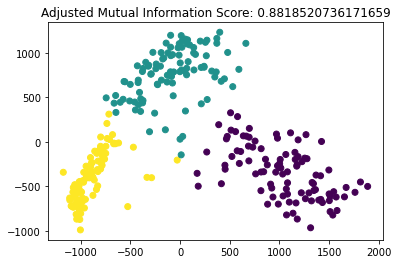

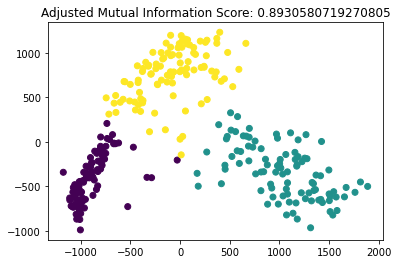

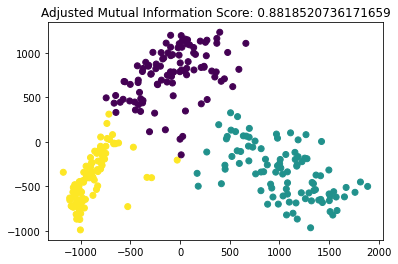

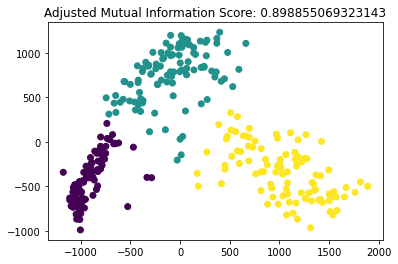

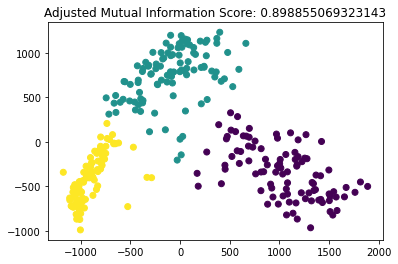

In [420]:
from sklearn.metrics import adjusted_mutual_info_score
num_runs = 5
adj_mi_list = []
for _ in range(num_runs):
  # This is where you call KMeans to get the clustering result
  labels = KMeans(x, n_clusters=3)
  # Since we know the ground truth labels, we can measure how good our clustering result is. 
  adj_mi = adjusted_mutual_info_score(labels_true=y, labels_pred=labels)
  adj_mi_list.append(adj_mi)
  plt.scatter(x_pc[:, 0], x_pc[:, 1], c=labels)
  plt.title(f'Adjusted Mutual Information Score: {adj_mi}')
  plt.show()

In [416]:
print(adj_mi_list)

[0.8988550693231429, 0.8818520736171659, 0.54357008211503, 0.898855069323143, 0.8818520736171659]


## Pause and think: why does KMeans return different results each run?